### Imports 

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd
import pingouin as pg
from neuropy import plotting
import numpy as np
import subjects

### Time constants using Giri2019 method

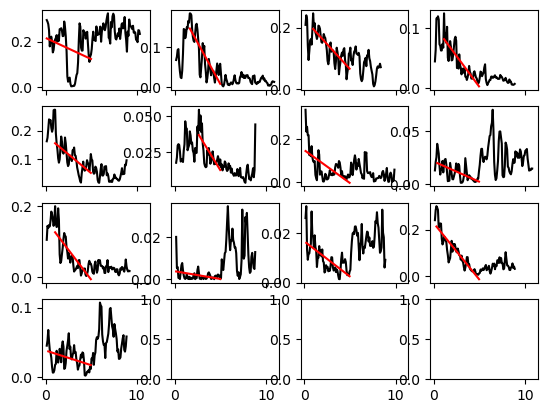

In [2]:
ev_df = subjects.GroupData().ev_pooled
names = ev_df.name.unique()

_, axs = plt.subplots(4, 4, sharex=True)
axs = axs.reshape(-1)

time_const_df = []
for i, name in enumerate(names):
    df = ev_df[ev_df.name == name]
    zt = df.zt.values
    ev = df.ev.values
    grp = df.grp.unique()

    zt5_ind = np.argmax(np.where(zt <= 5)[0])
    ev_max_ind = np.argmax(ev[zt <= 5])

    ev_zt5 = ev[ev_max_ind : zt5_ind + 1]
    zt5 = zt[ev_max_ind : zt5_ind + 1]

    linfit = stats.linregress(zt5, ev_zt5)
    ev_fit = linfit.slope * zt5 + linfit.intercept

    half_max_ev = ev[ev_max_ind] / 2
    half_max_zt = (half_max_ev - linfit.intercept) / linfit.slope
    if half_max_zt < 0:
        half_max_zt = 0

    time_const_df.append(pd.DataFrame(dict(tc=[half_max_zt], name=name, grp=grp)))
    ax = axs[i]
    ax.plot(zt, ev, "k")
    ax.plot(zt5, ev_fit, "r")
    # print(ev_max_ind,name)


time_const_df = pd.concat(time_const_df, ignore_index=True)

In [3]:
from statannotations.Annotator import Annotator

# _,ax = plt.subplots()

fig = plotting.Fig(
    grid=(14, 6), fontsize=5, constrained_layout=False, axis_lw=0.8, tick_size=2
)
ax = fig.subplot(fig.gs[:2, 2])

plot_kw = dict(data=time_const_df, x="grp", y="tc", ax=ax)
sns.stripplot(
    **plot_kw, palette=subjects.colors_sd(), edgecolor="w", linewidth=0.4, size=2.6
)
sns.barplot(**plot_kw, facecolor="w", linewidth=0.5, edgecolor="0.2", ci=None)

orders = time_const_df.grp.unique()
pairs = [("NSD", "SD")]
annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
annotator.configure(test="Kruskal", **subjects.stat_kw)
annotator.apply_and_annotate()
annotator.reset_configuration()
ax.set_xlabel("")
ax.set_ylabel("EV time constant (h)")
ax.set_ylim(top=5)

fig.savefig(subjects.figpath_sd / "time_constants")

TypeError: Fig.__init__() missing 2 required positional arguments: 'nrows' and 'ncols'

### time constants using best fit from max to EV = REV

In [ ]:
ev_df = subjects.GroupData().ev_pooled
names = ev_df.name.unique()

_, axs = plt.subplots(4, 4, sharex=True)
axs = axs.reshape(-1)

time_const_df = []
for i, name in enumerate(names):
    df = ev_df[ev_df.name == name]
    zt = df.zt.values
    ev = df.ev.values
    rev = df.rev.values
    grp = df.grp.unique()

    ev_max_ind = np.argmax(ev[zt <= 5])
    crossings = np.where((ev - rev) <= 0)[0]
    cross_ind = crossings[np.where(crossings > ev_max_ind)[0]][0]

    ev_to_cross = ev[ev_max_ind : cross_ind + 1]
    zt_cross = zt[ev_max_ind : cross_ind + 1]

    linfit = stats.linregress(zt_cross, ev_to_cross)
    ev_fit = linfit.slope * zt_cross + linfit.intercept

    half_max_ev = ev[ev_max_ind] / 2
    half_max_zt = (half_max_ev - linfit.intercept) / linfit.slope

    if i == 0:
        half_max_zt = 8

    time_const_df.append(pd.DataFrame(dict(tc=[half_max_zt], name=name, grp=grp)))
    ax = axs[i]
    ax.plot(zt, ev, "k")
    ax.plot(zt, rev, "g")
    ax.plot(zt_cross, ev_fit, "r")
    # print(ev_max_ind,name)


time_const_df = pd.concat(time_const_df, ignore_index=True)

In [ ]:
from statannotations.Annotator import Annotator

# _,ax = plt.subplots()

fig = plotting.Fig(
    grid=(14, 8), fontsize=5, constrained_layout=False, axis_lw=0.8, tick_size=2
)
ax = fig.subplot(fig.gs[:2, 2])

plot_kw = dict(data=time_const_df, x="grp", y="tc", ax=ax)
sns.stripplot(
    **plot_kw, palette=subjects.colors_sd(), edgecolor="w", linewidth=0.4, size=2.6
)
sns.barplot(**plot_kw, facecolor="w", linewidth=0.5, edgecolor="0.2", ci=None)

orders = time_const_df.grp.unique()
pairs = [("NSD", "SD")]
annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
annotator.configure(test="Kruskal", **subjects.stat_kw)
annotator.apply_and_annotate()
annotator.reset_configuration()
ax.set_xlabel("")
ax.set_ylabel("EV time constant (h)")
# ax.set_ylim(top=5)

fig.savefig(subjects.figpath_sd / "time_constants")

### Using time till EV = REV

In [ ]:
ev_df = subjects.GroupData().ev_pooled
names = ev_df.name.unique()

_, axs = plt.subplots(4, 4, sharex=True)
axs = axs.reshape(-1)

time_const_df = []
for i, name in enumerate(names):
    df = ev_df[ev_df.name == name]
    zt = df.zt.values
    ev = df.ev.values
    rev = df.rev.values
    grp = df.grp.unique()

    ev_max_ind = np.argmax(ev[zt <= 5])
    crossings = np.where((ev - rev) <= 0)[0]
    cross_ind = crossings[np.where(crossings > ev_max_ind)[0]][0]

    tc = zt[cross_ind]

    time_const_df.append(pd.DataFrame(dict(tc=[tc], name=name, grp=grp)))
    ax = axs[i]
    ax.plot(zt, ev, "k")
    ax.plot(zt, rev, "g")
    ax.axvline(tc)
    # print(ev_max_ind,name)


time_const_df = pd.concat(time_const_df, ignore_index=True)

In [ ]:
from statannotations.Annotator import Annotator

# _,ax = plt.subplots()

fig = plotting.Fig(
    grid=(14, 9), fontsize=5, constrained_layout=False, axis_lw=0.8, tick_size=2
)
ax = fig.subplot(fig.gs[:2, 2])

plot_kw = dict(data=time_const_df, x="grp", y="tc", ax=ax)
sns.stripplot(
    **plot_kw, palette=subjects.colors_sd(), edgecolor="w", linewidth=0.4, size=2.6
)
sns.barplot(**plot_kw, facecolor="w", linewidth=0.5, edgecolor="0.2", ci=None)

orders = time_const_df.grp.unique()
pairs = [("NSD", "SD")]
annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
annotator.configure(test="t-test_ind", **subjects.stat_kw)
annotator.apply_and_annotate()
annotator.reset_configuration()

ax.set_xlabel("")
ax.set_ylabel("EV time constant (h)")
# ax.set_ylim(top=5)

fig.savefig(subjects.figpath_sd / "time_constants")

### Using autocorrelation
- Use time it takes to decay to half-max


In [ ]:
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest

grpdata = subjects.GroupData()
ev_df = grpdata.ev_pooled

fig = plotting.Fig(
    grid=(14, 7), fontsize=5, constrained_layout=False, axis_lw=0.8, tick_size=2
)

sess_inds = ev_df["sub"].unique()

tc_df = []
for s in sess_inds:
    df = ev_df[ev_df["sub"] == s]
    ev = df["ev"].values
    zt = df["zt"].values
    grp = df.grp.unique()

    ev_autocorr = np.correlate(ev, ev, "same")
    y = ev_autocorr[len(ev_autocorr) // 2 :]
    x_half = np.where(y < (y[0] / 2))[0][0]
    x_half = x_half * (5 / 60)

    ax = fig.subplot(fig.gs[:2, 2])

    col = "r" if grp == "SD" else "k"
    ax.plot(np.arange(len(y)) * (5 / 60), y / y.max(), color=col, lw=0.8)
    tc_df.append(pd.DataFrame(dict(tc=[x_half], grp=grp)))


ax.axhline(0.5, ls="--", color="g")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Autocorr (a.u.)")

tc_df = pd.concat(tc_df, ignore_index=True)

ax = fig.subplot(fig.gs[:2, 4])
# ax.plot()
plot_kw = dict(data=tc_df, x="grp", y="tc", ax=ax)
sns.stripplot(
    **plot_kw, palette=subjects.colors_sd(), edgecolor="w", linewidth=0.4, size=2.6
)
sns.barplot(
    **plot_kw, palette=subjects.colors_sd(), ci=None, edgecolor="0.2", facecolor="w"
)
ax.set_ylabel("Half max decay constant (h)")
ax.set_xlabel("")

orders = tc_df.grp.unique()
pairs = [("NSD", "SD")]


# annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
# annotator.configure(test="Kruskal", **subjects.stat_kw)
# annotator.apply_and_annotate()
# annotator.reset_configuration()

custom_long_name = "Wilcoxon_ranksum"
custom_short_name = "Wilcoxon_ranksum"
custom_func = stats.ranksums
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
# stat_kw['loc']='inside'
# stat_kw['text_offset']=0.02
# stat_kw['verbose']=False

annotator.configure(test="t-test_welch", **subjects.stat_kw)
# annotator.configure(
#     test=custom_test, **subjects.stat_kw, color="k", comparisons_correction=None
# )

annotator.apply_and_annotate()
annotator.reset_configuration()

# fig.savefig(subjects.figpath_sd/'autocorr_decay_constant')

### Using autocorrelation and exponential fit

In [ ]:
from scipy.optimize import curve_fit
from statannotations.Annotator import Annotator

grpdata = subjects.GroupData()
ev_df = grpdata.ev_pooled

# def exponential(x, a, b,c):
#     return a*np.exp(-b*x)+c


def exponential(x, b):
    return np.exp(-x / b)


# def exponential(x,a,tau):
#     return a*((1-x)**tau)


fig = plotting.Fig(grid=(7, 5))

sess_inds = ev_df["sub"].unique()

tc_df = []
for s in sess_inds:
    df = ev_df[ev_df["sub"] == s]
    ev = df["ev"].values
    zt = df["zt"].values
    grp = df.grp.unique()

    ev_autocorr = np.correlate(ev, ev, "same")
    y = ev_autocorr[len(ev_autocorr) // 2 :]
    y = y / y.max()
    x = np.arange(len(y)) * (5 / 60)

    pars, cov = curve_fit(exponential, xdata=x, ydata=y)

    ax = fig.subplot(fig.gs[2])

    col = "r" if grp == "SD" else "k"
    # ax.plot(x,y/y.max(),color=col)
    ax.plot(x, y, color=col, lw=0.5)
    ax.plot(x, exponential(x, *pars), color=col, alpha=0.5, lw=0.5)
    tc_df.append(pd.DataFrame(dict(tc=[pars[0]], grp=grp)))


ax.axhline(0.5, ls="--", color="g")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Autocorr (a.u.)")

tc_df = pd.concat(tc_df, ignore_index=True)

ax = fig.subplot(fig.gs[3])
# ax.plot()
plot_kw = dict(data=tc_df, x="grp", y="tc", ax=ax)
sns.stripplot(**plot_kw, palette=subjects.colors_sd())
sns.barplot(
    **plot_kw, palette=subjects.colors_sd(), ci=None, edgecolor="0.2", facecolor="w"
)
ax.set_ylabel("Tau")
ax.set_xlabel("")

orders = tc_df.grp.unique()
pairs = [("NSD", "SD")]
annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
annotator.configure(test="t-test_ind", **subjects.stat_kw)
annotator.apply_and_annotate()
annotator.reset_configuration()

# fig.savefig(subjects.figpath_sd/'autocorr_exp_decay_constant')

### Decay time constants generated using bootstrap explained variance

In [2]:
nrem_df = subjects.GroupData().ev_mean_aligned_by_NREM_onset
wake_df = subjects.GroupData().ev_mean_aligned_by_WAKE

In [14]:
nrem_df

,zt,ev,grp
0,0,0.078993,NSD
1,1,0.057443,NSD
2,10,0.097247,NSD
3,11,0.087940,NSD
4,12,0.081187,NSD
...,...,...,...
116122,5,0.053974,SD
116123,6,0.046985,SD
116124,7,0.036955,SD
116125,8,0.029885,SD


In [12]:
a = np.arange(25).reshape(5, 5).astype("float")
a[1, 2] = np.nan

df = pd.DataFrame(a)
df

,0,1,2,3,4
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0
4,20.0,21.0,22.0,23.0,24.0


In [13]:
df.mean(axis=0)

0    10.00
1    11.00
2    13.25
3    13.00
4    14.00
dtype: float64